# Clase 11: Transformada de Fourier continua, ejemplos integradores

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv
from matplotlib.colors import Normalize

## Enventanado de señales
Vamos a trabajar con una señal seno. En principio, consideremos que nuestra señal completa dura $15s$.

Text(0.5, 1.0, 'Seno con $t_{f} = 15s$: señal completa')

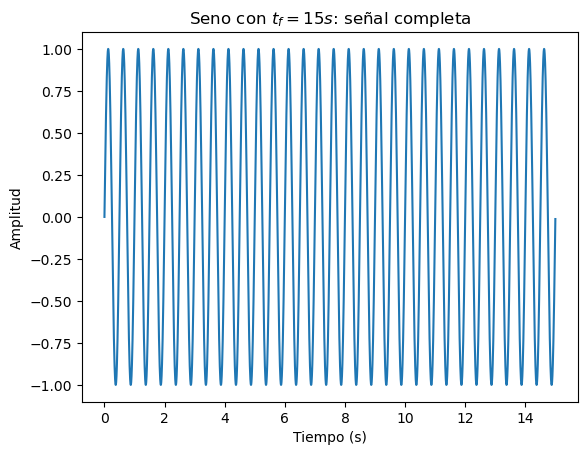

In [2]:
f = 2     # el seno tiene frecuencia 2 Hz
tf = 15   # Me defino el tiempo final del vector en 20s, el ti = 0 lo dejo fijo en 0s

h = 0.001    # Paso del vector de tiempo
t = np.arange(0, tf, h)

s_comp = np.sin(2*np.pi*f*t)

plt.figure()
plt.plot(t, s_comp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Seno con $t_{f} = ' + str(tf) + 's$: señal completa')


Veamos el espectro en frecuencia de esta señal. Se va a usar un algoritmo computacional llamado Fast Fourier Transform (fft), que permite calcular rápidamente la Transformada de Fourier en tiempo discreto. Hasta ahora solo se ha visto la Transformada en tiempo continuo, pero esto no presenta ningún problema, ya que solo vamos a hacer un análisis cualitativo, por lo cual, usar la fft no es problema.

(-3.0, 3.0, -0.1, 1.0)

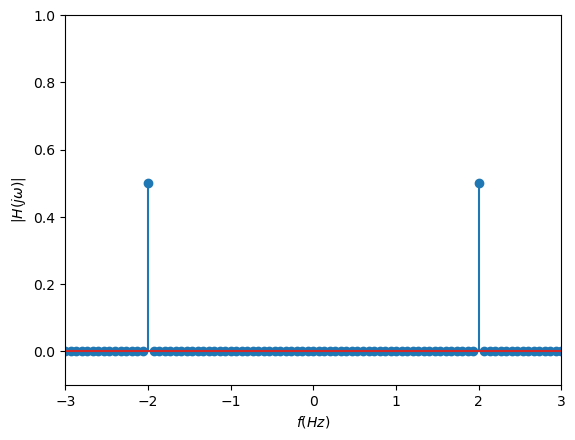

In [3]:
# Calculo de la transformada rapida de Fourier
S_comp = np.fft.fft(s_comp)/len(s_comp)   # FFT del seno, ventana rectangular, tf = 15
freq = np.fft.fftfreq(len(t), d = h)    # Notar que el eje de frecuencia depende solo de t, no de la se;al que estoy transformando

plt.figure()
plt.stem(freq, np.abs(S_comp))
plt.xlabel('$f(Hz)$')
plt.ylabel('$|H(j\omega)|$')
plt.axis([-3, 3, -0.1, 1])

Se puede ver que el espectro en frecuencia es el esperado.

Ahora vamos a aplicar distintas ventanas, y evaluar como cambia el espectro en frecuencia en consecuencia.
- Ventana rectangular.
- Hamming.
- Hann.
- Blackman.

Text(0.5, 1.0, 'Ventana rectangular')

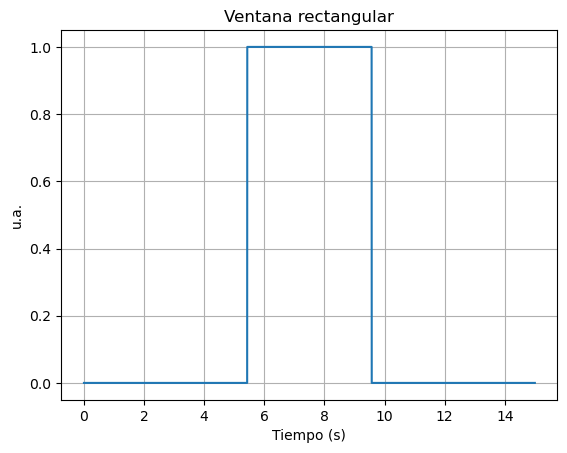

In [4]:
# Diseño de ventana rectangular. Me quiero quedar con 4.14s de la señal
tam_ventana = 4.14  # tamano de la ventana en segundos
tam_ventana_muestras = int(4.14*(1/h))  # tamano de la ventana en muestras

# Quiero que la ventana este centrada
mitad = len(t)/2
ini = mitad - tam_ventana_muestras/2  # muestra de inicio de la ventana
fin = mitad + tam_ventana_muestras/2  # muestra de fin de la ventana

ini = int(ini)
fin = int(fin)

# Definicion de la ventana rectangular
ventana = np.zeros(len(t))
ventana[ini:fin] = 1

plt.figure()
plt.plot(t, ventana)
plt.xlabel('Tiempo (s)')
plt.ylabel('u.a.')
plt.grid()
plt.title('Ventana rectangular')


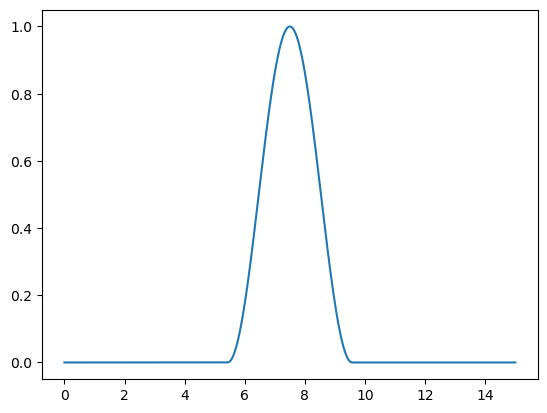

In [5]:
# Diseño de ventana de Hamming.
# Vamos a usar el mismo indice de inicio ("ini"), indice de fin ("fin"), tamano de ventana ("tam_ventana_muestras")
''' 
Recomendacion: usar codigo del bloque anterior 
# Definicion de la ventana rectangular
ventana = np.zeros(len(t))
ventana[int(ini):int(fin)] = 1 
'''

ventana_Hamming = np.zeros(len(t))
ventana_Hamming[ini:fin] = np.hamming(int(tam_ventana_muestras))

ventana_Hamming[ini:fin] = ventana_Hamming[ini:fin] - np.min(ventana_Hamming[ini:fin])
ventana_Hamming = ventana_Hamming/np.max(ventana_Hamming)
plt.figure()
plt.plot(t, ventana_Hamming)








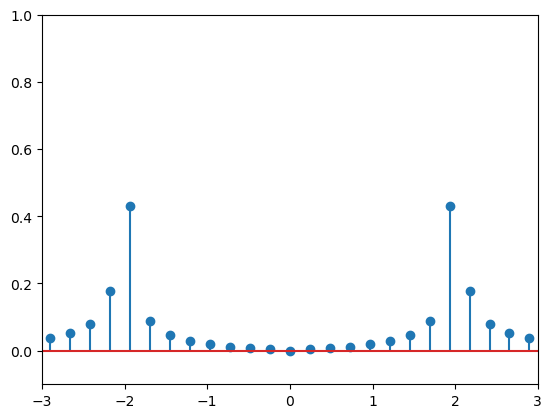

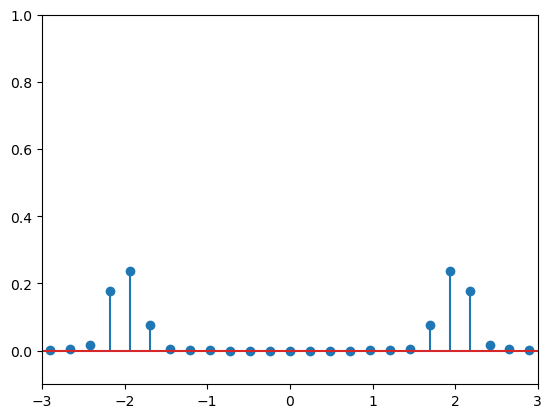

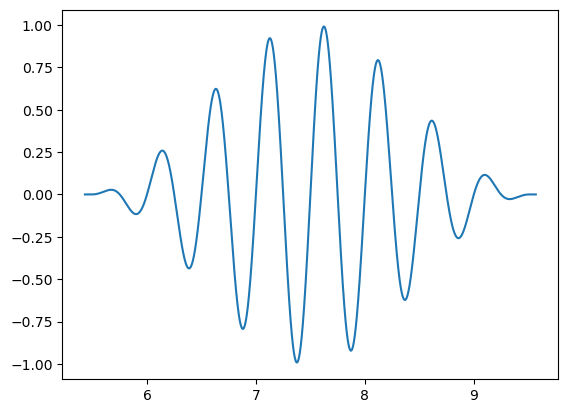

In [6]:
sig_rect = s_comp * ventana
sig_hamm = s_comp * ventana_Hamming

rect = np.fft.fft(sig_rect[ini:fin])/len(sig_rect[ini:fin])   # FFT de la ventana rectangular
hamm = np.fft.fft(sig_hamm[ini:fin])/len(sig_hamm[ini:fin])   # FFT de la ventana de Hamming
freq = np.fft.fftfreq(len(t[ini:fin]), d = h)    # Mientras mantenga el t puedo seguir usando el mismo eje de frecuencias

plt.figure()
plt.stem(freq, np.abs(rect))
plt.axis([-3, 3, -0.1, 1])

plt.figure()
plt.stem(freq, np.abs(hamm))
plt.axis([-3, 3, -0.1, 1])

plt.figure()
plt.plot(t[ini:fin], sig_hamm[ini:fin])


**Pregunta: ¿considera que el enventanado tiene un efecto positivo?**
<br>
Respuesta:

## Análisis espectral

### Suma y mezcla de senos
Se trabajará con tres senos. La idea es: por un lado sumarlos a lo largo de todo el eje, y chequear que el comportamiento de frecuencia es el esperado, y por otro concatenarlos y hacer un análisis espectral. De esta forma, se busca ilustrar que para los casos en que se tienen señales temporales que cambian su comportamiento en frecuencia a lo largo del tiempo, un análisis espectral puede aportar información muy valiosa.

Text(0.5, 0, 't[s]')

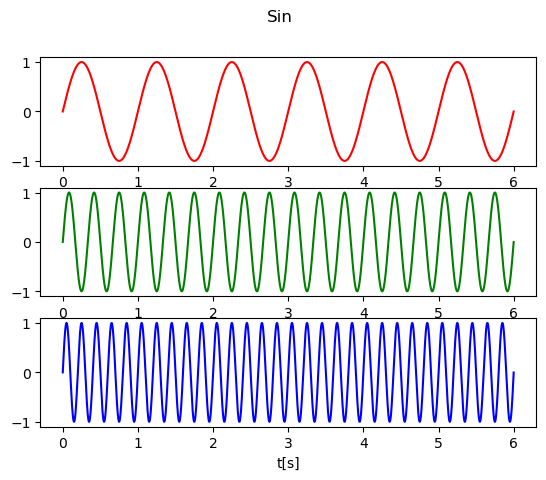

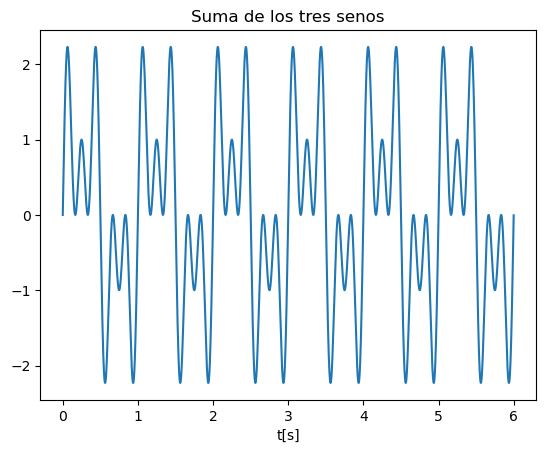

In [7]:
# se define el eje de tiempo y las señales seno a utilizar

# paso del eje de tiempo
dt = 0.0001
t = np.arange(0.0, 6.0, dt)

# Defino las frecuencias en Hz de los senos que voy a usar
f1 = 1
f2 = 3
f3 = 5

# Defino los senos de diferentes frecuencias que voy a usar
s1 = np.sin(2 * np.pi * f1 * t)
s2 = np.sin(2 * np.pi * f2 * t)
s3 = np.sin(2 * np.pi * f3 * t)  

# Visualizar las senales
fig1, axs1 = plt.subplots(3)
fig1.suptitle('Sin')
axs1[0].plot(t, s1, 'r')
axs1[1].plot(t, s2, 'g')
axs1[2].plot(t, s3, 'b')
plt.xlabel('t[s]')

# Calculo la suma de los tres senos
suma_senos = s1+s2+s3

# Visualizo suma_senos
plt.figure(3)
plt.plot(t, suma_senos)
plt.title('Suma de los tres senos')
plt.xlabel('t[s]')

Ahora voy a construir la mezcla de los senos. Para ello voy a concatenar las tres senales en cuestion. Voy a dividir el eje de tiempo en 3 partes, y mediante pulsos, voy a ir "activando" las senales de a una. De esta forma, en cada una de estas fracciones de tiempo, solo se va a tener una de las tres senales.

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_11808\405049330.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n1 = np.int(np.floor(len(t) / 3.0))
C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_11808\405049330.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check 

Text(0.5, 0, 't[s]')

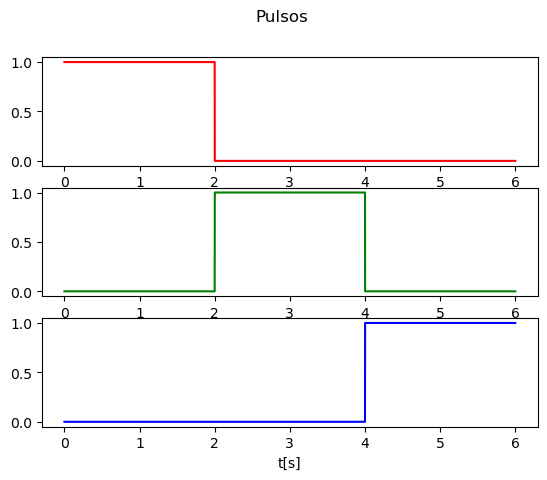

In [8]:
# Defino los pulsos prendidos en diferentes tiempos que voy a usar
nmax = len(t)
n1 = np.int(np.floor(len(t) / 3.0))
n2 = np.int(np.ceil(len(t) * 2.0 / 3))
p1 = np.concatenate([np.ones(n1), np.zeros(n2)])  # pulso 1
p2 = np.concatenate([np.zeros(n1), np.ones(n1), np.zeros(nmax-2*n1)])  # pulso 2
p3 = np.concatenate([np.zeros(n2), np.ones(n1)])  # pulso 3

fig2, axs2 = plt.subplots(3)
fig2.suptitle('Pulsos')
axs2[0].plot(t, p1, 'r')
axs2[1].plot(t, p2, 'g')
axs2[2].plot(t, p3, 'b')
plt.xlabel('t[s]')



Por lo tanto, quiero construir una senal que dure $6s$, y que concatene $2s$ de cada una de las senales solas.

Text(0.5, 0, 't[s]')

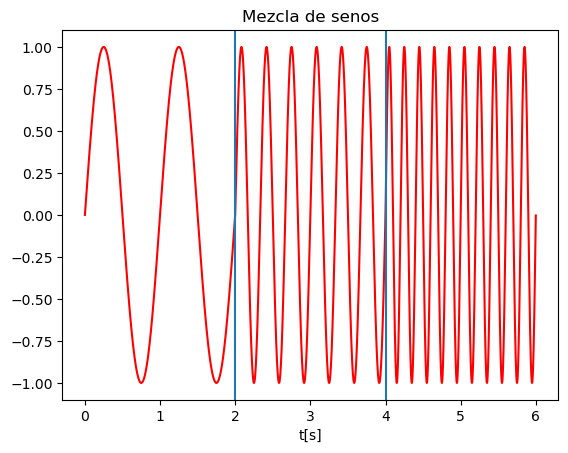

In [9]:
# Mezclo en un mismo eje de tiempo los tres senos usando los pulsos para que queden en diferentes tiempos

# Completar estudiantes
mezcla_senos = s1*p1+s2*p2+s3*p3

plt.figure(4)
plt.plot(t, mezcla_senos, 'r')
plt.axvline(t[int(len(t) / 3)], 0, 1)
plt.axvline(t[int(len(t) * (2/3))], 0, 1)
plt.title('Mezcla de senos')
plt.xlabel('t[s]')

Ahora procedemos a ver qué pasa en frecuencia.

Text(0.5, 0, '$f[Hz]$')

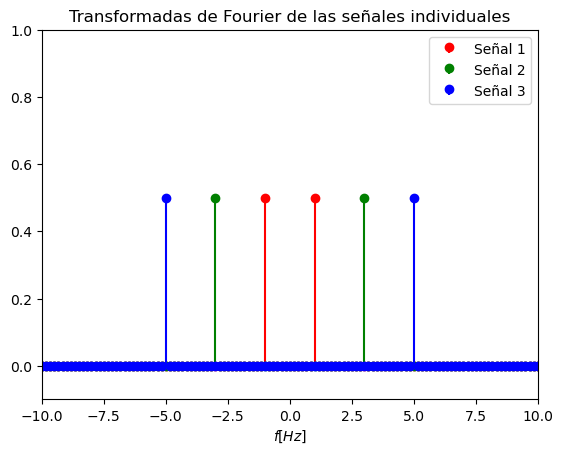

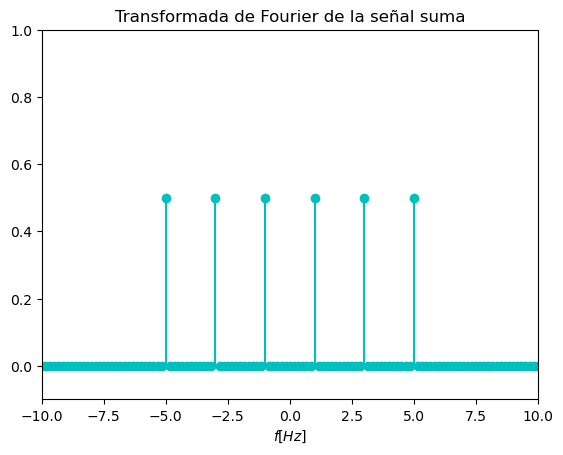

In [10]:
# Construccion del eje de frecuencia
freq_ts = np.fft.fftfreq(t.shape[-1], d = dt)

# Calculo de las transformadas de cada una de las senales individuales
ts1 = np.fft.fft(s1) / len(s1)
ts2 = np.fft.fft(s2) / len(s2)
ts3 = np.fft.fft(s3) / len(s3)

# Transformada de la suma de las senales
tsuma_senos = np.fft.fft(suma_senos) / len(suma_senos)

color1 = 'r'
color2 = 'g'
color3 = 'b'

plt.figure(5)
plt.stem(freq_ts, abs(ts1), linefmt=f'{color1}-', markerfmt=f'{color1}o', basefmt=' ', use_line_collection=True, label = 'Señal 1')
plt.stem(freq_ts, abs(ts2), linefmt=f'{color2}-', markerfmt=f'{color2}o', basefmt=' ', use_line_collection=True, label = 'Señal 2')
plt.stem(freq_ts, abs(ts3), linefmt=f'{color3}-', markerfmt=f'{color3}o', basefmt=' ', use_line_collection=True, label='Señal 3')
plt.axis([-10, 10, -0.1, 1])
plt.title('Transformadas de Fourier de las señales individuales')
plt.legend()
plt.xlabel('$f[Hz]$')

color4 = 'c'
plt.figure()
plt.stem(freq_ts, abs(tsuma_senos), linefmt=f'{color4}-', markerfmt=f'{color4}o', basefmt=' ', use_line_collection=True)
plt.axis([-10, 10, -0.1, 1])
plt.title('Transformada de Fourier de la señal suma')
plt.xlabel('$f[Hz]$')

**Pregunta: ¿por qué los espectros de las dos gráficas mostradas son iguales?**
Respuesta:

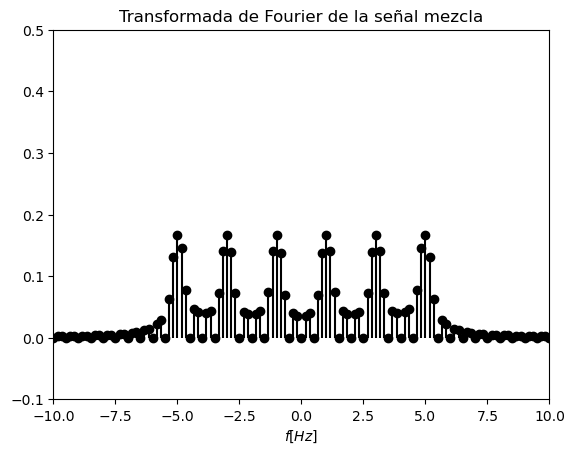

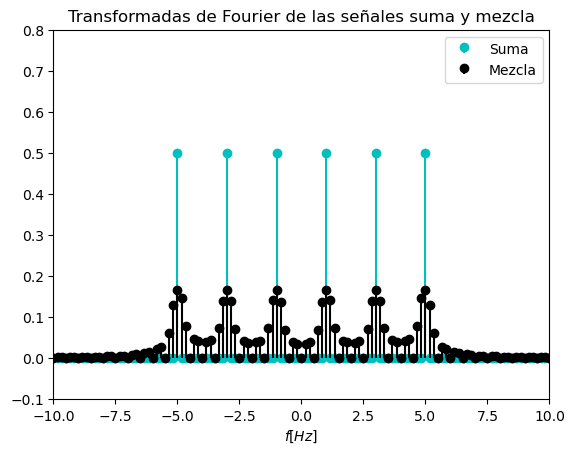

In [11]:
# Transformada de la mezcla de las senales
tmezcla_senos = np.fft.fft(mezcla_senos) / len(mezcla_senos)

color5 = 'k'
plt.figure()
plt.stem(freq_ts, abs(tmezcla_senos), linefmt=f'{color5}-', markerfmt=f'{color5}o', basefmt=' ', use_line_collection=True)
plt.axis([-10, 10, -0.1, 0.5])
plt.title('Transformada de Fourier de la señal mezcla')
plt.xlabel('$f[Hz]$')

plt.figure()
plt.stem(freq_ts, abs(tsuma_senos), linefmt=f'{color4}-', markerfmt=f'{color4}o', basefmt=' ', use_line_collection=True, label = 'Suma')
plt.stem(freq_ts, abs(tmezcla_senos), linefmt=f'{color5}-', markerfmt=f'{color5}o', basefmt=' ', use_line_collection=True, label = 'Mezcla')
plt.axis([-10, 10, -0.1, 0.8])
plt.title('Transformadas de Fourier de las señales suma y mezcla')
plt.xlabel('$f[Hz]$')
plt.legend()


**Analice similitudes y diferencias entre el espectro de frecuencia de la señal suma y mezcla**
<br>
Respuesta:

Como se mencionaba anteriormente, para señales que cambian su comportamiento en frecuencia de forma marcada a lo largo del tiempo, como la señal mezcla, en interesante hacer un análisis espectral. Esto permite estudiar la señal por fragmentos, los cuales poseen características específicas. Se procede a hacer esto.

(0.0, 100.0)

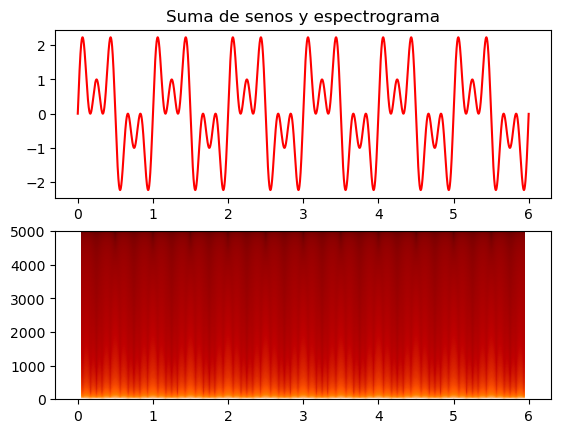

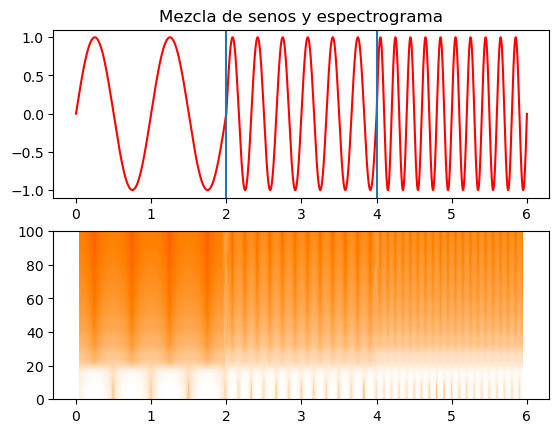

In [12]:
'''Espectrogramas'''

NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)

plt.figure(7)
ax1 = plt.subplot(211)
plt.plot(t, suma_senos, 'r')
plt.title('Suma de senos y espectrograma')
plt.subplot(212, sharex=ax1)
plt.specgram(suma_senos, NFFT=NFFT, Fs=Fs, noverlap=900, cmap=plt.cm.gist_heat, scale='dB')

plt.figure(8)
ax1 = plt.subplot(211)
plt.plot(t, mezcla_senos, 'r')
plt.axvline(t[int(len(t) / 3)], 0, 1)
plt.axvline(t[int(len(t) * (2/3))], 0, 1)
plt.title('Mezcla de senos y espectrograma')
ax2 = plt.subplot(212, sharex=ax1)
plt.specgram(mezcla_senos, NFFT=NFFT, Fs=Fs, noverlap=900, cmap=plt.cm.gist_heat, scale='dB')
ax2.set_ylim([0, 100])


**Pregunta: ¿cree que el espectrograma aporta información útil?**
<br>
Respuesta:

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_11808\2727318241.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax8 = fig8.gca(projection='3d')
C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_11808\2727318241.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax9 = fig9.gca(projection='3d')


Text(0.5, 0, 'Tiempo [s]')

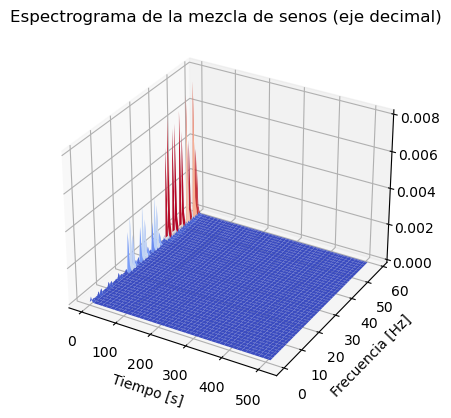

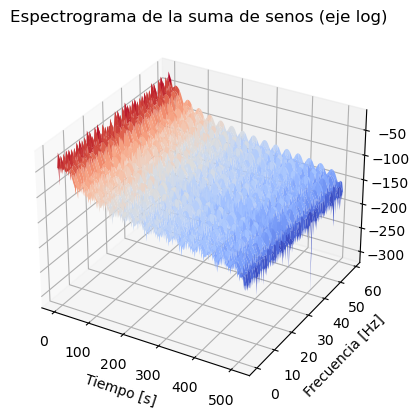

In [13]:
'''Espectrograma 3D'''
# extract the spectrum
#%matplotlib qt
freq_bins, timestamps, spec = signal.spectrogram(mezcla_senos, NFFT)
freq_bins_suma, timestamps_suma, spec_suma = signal.spectrogram(suma_senos, NFFT)

fig8 = plt.figure(9)
ax8 = fig8.gca(projection='3d')
ax8.plot_surface(freq_bins[:, None], timestamps[None, :], spec, cmap=cm.coolwarm)
plt.title('Espectrograma de la mezcla de senos (eje decimal)')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')

fig9 = plt.figure(10)
ax9 = fig9.gca(projection='3d')
ax9.plot_surface(freq_bins_suma[:, None], timestamps_suma[None, :], 10.0*np.log10(spec_suma), cmap=cm.coolwarm)
plt.title('Espectrograma de la suma de senos (eje log)')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')

### Oculograma

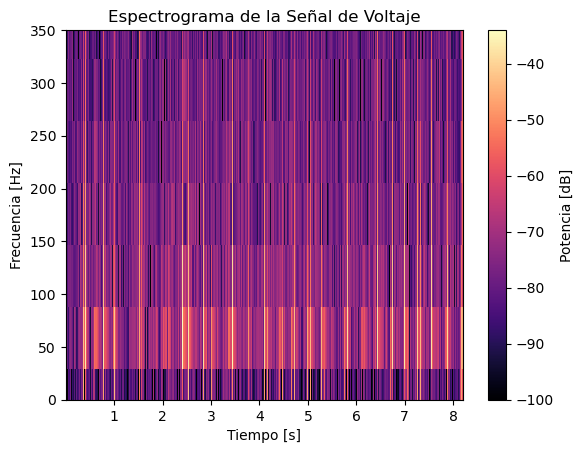

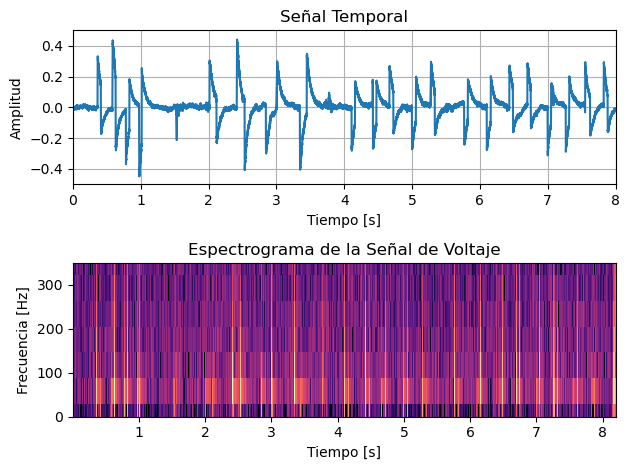

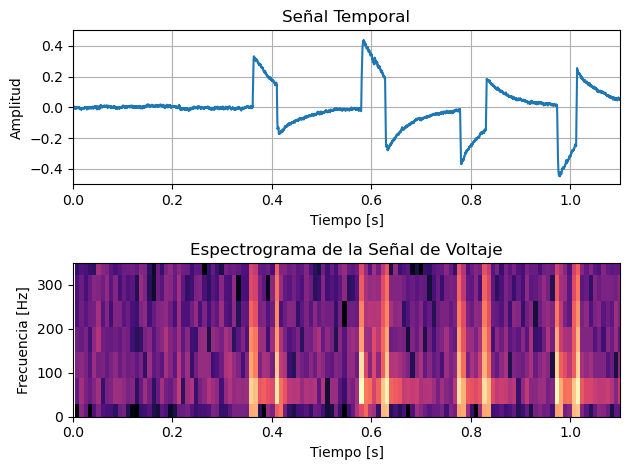

In [50]:
filename='Andres.csv'

t_list=[]
s_list = []

with open(filename, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    i=0
    for row in spamreader:
        if i>=9:
            if len(row[1])>0:
                t_list.append(float(row[0]))
                s_list.append(float(row[1]))
                
        i=i+1
t = np.array(t_list)
s = np.array(s_list)

#plt.figure()
#plt.plot(t, s)

# Espectrograma
# Parámetros del espectrograma
window_size = 1024
overlap = 512
max_frequency = 350  # límite superior del eje de frecuencia

fs = 1/(t[1] - t[0])  # frecuencia de muestreo en Hz. Asumo frec de muestreo constante

# Calcular el espectrograma
frequencies, times, Sxx = signal.spectrogram(s, fs=fs, window='hann', nperseg=window_size, noverlap=overlap)

# Ajustar manualmente la escala para que la minima potencia sea -100 dB. Es para aprovechar mejor el eje.
Sxx[Sxx < -100] = -100

# Grafico del espectrograma solo
plt.figure()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto',cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia
plt.colorbar(label='Potencia [dB]')


# Grafico senal temporal y espectrograma juntos
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Señal Temporal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.axis([0, 8, -0.5, 0.5])
plt.grid()
# Crear un subplot para el espectrograma
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia

# Ajustar el diseño del subplot
plt.tight_layout()

# Grafico senal temporal y espectrograma juntos con zoom
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Señal Temporal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.axis([0, 1.1, -0.5, 0.5])
plt.grid()
# Crear un subplot para el espectrograma
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia
plt.xlim(0, 1.1)  # Establecer el límite superior del eje de frecuencia

# Ajustar el diseño del subplot
plt.tight_layout()



**Pregunta: ¿cree que el espectrograma aporta información útil? Explique**
<br>
Respuesta:
<br>
**Pregunta: ¿en qué aplicación piensa que podría usarse esta información?**
<br>
Respuesta: